In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk

In [2]:
# Download NLTK data
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# Load the dataset
data_path = "C:/Users/husna ezzah/Downloads/go_emotions_dataset.csv"
df = pd.read_csv(data_path)

In [16]:
# Check duplicates and null values 
print("Null values:\n", df.isnull().sum())
print("Duplicate values:", df.duplicated().sum())

Null values:
 text              0
admiration        0
amusement         0
anger             0
annoyance         0
approval          0
caring            0
confusion         0
curiosity         0
desire            0
disappointment    0
disapproval       0
disgust           0
embarrassment     0
excitement        0
fear              0
gratitude         0
grief             0
joy               0
love              0
nervousness       0
optimism          0
pride             0
realization       0
relief            0
remorse           0
sadness           0
surprise          0
neutral           0
dtype: int64
Duplicate values: 57090


In [4]:
# Inspect the dataset
print("Dataset columns:", df.columns)

Dataset columns: Index(['id', 'text', 'example_very_unclear', 'admiration', 'amusement',
       'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity',
       'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
       'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
       'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
       'sadness', 'surprise', 'neutral'],
      dtype='object')


In [5]:
# Step 1: Drop unnecessary columns
# Assuming 'text' is the main column for analysis and emotions are the rest
columns_to_keep = ['text'] + list(df.columns[3:])  # Keep 'text' and emotion columns
df = df[columns_to_keep]
print("Columns after dropping unnecessary ones:", df.columns)

Columns after dropping unnecessary ones: Index(['text', 'admiration', 'amusement', 'anger', 'annoyance', 'approval',
       'caring', 'confusion', 'curiosity', 'desire', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
       'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride',
       'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')


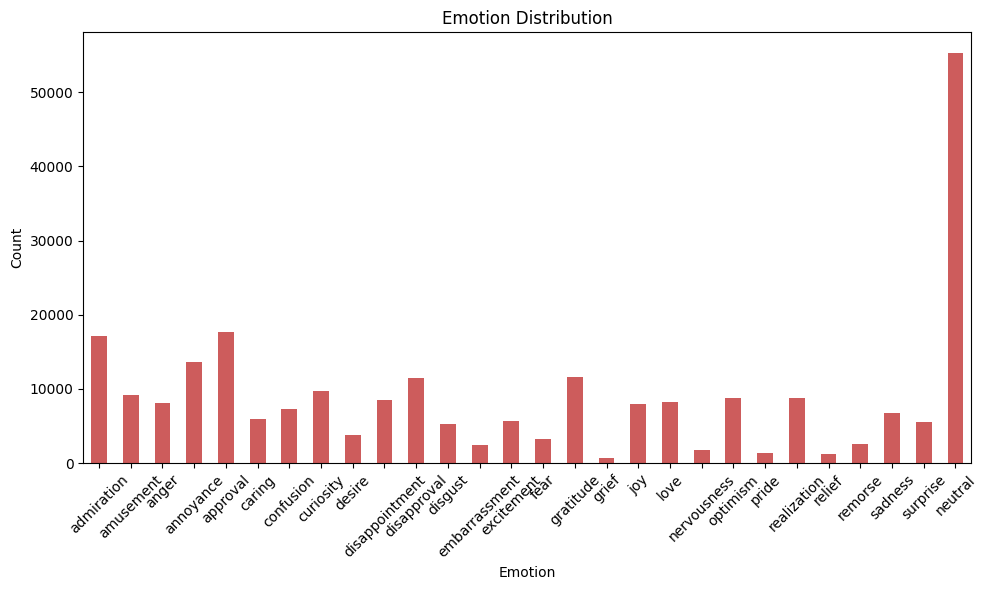

In [12]:
# Step 2: Data visualization for emotions
# Sum the binary emotion columns to get the distribution
emotion_counts = df.iloc[:, 1:].sum()  # Sum across all emotion columns
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='indianred')
plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()